### Proyecto de sistemas inteligentes para la toma de decisiones:

### Analisis y descripción de datos

### Keshava Tonathiu Sanchez Barbosa (418127029) keshava.t.s.b@gmail.com

In [83]:
import numpy as np
import pandas as pd
import graphviz
from bokeh.plotting import figure
from bokeh.io import output_notebook #output_file("file.html") para un archivo
from bokeh.io import show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.palettes import *
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import LabelSet, ColumnDataSource
from math import pi
from collections import Counter
output_notebook()

Loading BokehJS ...

### Leemos nuestro dataset y vemos la descripción de nuestro dataset

In [2]:
data = pd.read_csv('lol.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 12 columns):
Name                  89 non-null object
Team                  89 non-null object
Position              89 non-null object
KDA Ratio             89 non-null float64
Kills Total           89 non-null int64
Deaths                89 non-null int64
Assists               89 non-null int64
Kill Participation    89 non-null float64
CS Per Minute         89 non-null float64
CS Total              89 non-null int64
Minutes Played        89 non-null int64
Games Played          89 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 8.5+ KB


### Nuestro dataset consiste de 12 columnas y 89 entradas, donde cada columna a partir de la tercera contiene estadisticas del desempeño del jugador en el mundial de League of Legends de 2018. Aunado a esto tenemos 89 enetradas, cada una representa un jugador distinto

- ### 'Name' : Contiene el apodo del jugador
- ### 'Team' : Contiene el equipo al que pertenece el jugador
- ### 'Postion' : Contiene la posición/rol que juega el jugador
- ### 'KDA Ration' : contiene la proporcion de 'kills'(asesinatos) y 'Assists'(asistencia de asesinatos) por cada 'Deaths'(muerte(s))
- ### 'Kills Total' : Numero total de 'kills' obtenidas por el jugador
- ### 'Deaths' : Numero total de 'deaths' que sufrio el jugador
- ### 'Assists' : Numero total de 'assits' que obtuvo el jugador
- ### 'Kill Participation' : Contiene un valor entre 0 y 1 que representa su participacion total en asesinatos tanto 'kills' como 'assists'
- ### 'CS Per Minute' : Numero de subditos asesinados por minuto
- ### 'CS Total' : Numero de subditos asesinados en total
- ### 'Minutes played' : Minutos en total que jugo un participante
- ### 'Games Played' : Numero total de juegos en los que participo

### Ahora confirmaremos que nuestro dataset no tenga datos faltantes para saber que no necesitamos hacer mas preprocesamiento de datos y podemos continuar con el analisis

In [3]:
data.isna().sum()

Name                  0
Team                  0
Position              0
KDA Ratio             0
Kills Total           0
Deaths                0
Assists               0
Kill Participation    0
CS Per Minute         0
CS Total              0
Minutes Played        0
Games Played          0
dtype: int64

### Ahora veremos las primeras entradas del dataset, de esta manera tendremos una mejor idea de como esta representado todo

In [4]:
data.head()

,Name,Team,Position,KDA Ratio,Kills Total,Deaths,Assists,Kill Participation,CS Per Minute,CS Total,Minutes Played,Games Played
0,Rekkles,FNC,ADC,13.7,28,6,54,0.73,10.8,2156,200,7
1,Mata,KT,Support,12.2,4,5,57,0.78,1.5,265,182,6
2,Broxah,FNC,Jungle,11.1,30,7,48,0.70,5.4,1072,200,7
3,Mowgli,AFS,Jungle,9.0,2,0,7,0.75,5.3,139,26,1
4,Uzi,RNG,ADC,8.8,33,8,37,0.66,10.8,2740,253,8


### Entonces ahora que sabemos que significa cada columna del dataset, sabemos que esta integra y hemos dado un pequeño vistazo a la información podemos iniciar por la información mas sencilla de obtener, iniciando por los mejores 

### Primero, cada equipo consta de 5 titulares y tiene derecho a tener un jugador suplente, por lo tanto cada equipo es de 5 integrantes mas un suplente, asi que vamos a ver que rol es el que mas representaciṕon tiene en el dataset

In [5]:
roles = list(data['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('Jungle', 24), ('Top', 19), ('ADC', 16), ('Support', 15), ('Mid', 15)]

In [6]:
x = {}
for i in range(len(roles_n)):
    x[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x)

{'Jungle': 24, 'Top': 19, 'ADC': 16, 'Support': 15, 'Mid': 15}


In [119]:
data_pie = pd.Series(x).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = Plasma[len(x)]

p = figure(plot_height=400, title="Numero de jugadores por posición", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p.wedge(x=0, y=1, radius=0.45,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p.add_layout(labels)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [8]:
roles_name = []
roles_count = []
for i in range(len(roles_n)):
    roles_name.append(roles_n.most_common()[i][0])
    roles_count.append(roles_n.most_common()[i][1])
print(roles_name, roles_count)

['Jungle', 'Top', 'ADC', 'Support', 'Mid'] [24, 19, 16, 15, 15]


In [9]:
p1 = figure(x_range = roles_name, plot_height=250, title="Numero de jugadores por posición")
p1.vbar(x = roles_name, top = roles_count, width = 0.9, color = Plasma[5])
p1.xgrid.visible = False
p1.ygrid.visible = False
show(p1)

### En esta grafica tenemos información muy importante, quiza no sea apreciable dado que la base de una posición es 15, asi que como complemento antes de analisar grafiquemos nuevamente, pero quitando los 15 jugadores base

In [10]:
x_pie2 = {}
for i in range(2):
    x_pie2[roles_name[i]] = roles_count[i] - 16
print(x_pie2)

{'Jungle': 8, 'Top': 3}


In [11]:
data_pie = pd.Series(x_pie2).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = magma(2)

p_pie2 = figure(plot_height=350, title="Suplentes por rol", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie2.wedge(x=0, y=1, radius=0.45,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie2.add_layout(labels)

p_pie2.axis.axis_label=None
p_pie2.axis.visible=False
p_pie2.grid.grid_line_color = None

show(p_pie2)

In [12]:
roles_subs = []
for i in range(len(roles_count)):
    roles_subs.append(roles_count[i] - 15)
roles_subs

[9, 4, 1, 0, 0]

In [13]:
p2 = figure(x_range = roles_name, plot_height=250, title="Numero de suplentes por posición")
p2.vbar(x = roles_name, top = roles_subs, width = 0.9, color = Plasma[5])
p2.xgrid.visible = False
p2.ygrid.visible = False
p = gridplot([[p1, p2]], toolbar_location = "right")
show(p)

### Ambas graficas de barras representan el numero de jugadores por posición, el numero es representado en el eje Y, y la posición en el eje X

### Sobre el numero de jugadores por posición, podemos observar que de todos los participantes en el mundial, 26.96% cubren la posición de 'Jungle'(jungla) y asi mismo tiene la mayor cantidad de suplentes cubriendo 64.28% del total de suplentes.

### Por otro lado las posiciones 'Mid' y 'Support' son las posiciones con solo los jugadores titulares presentes cubriendo 16.85% cada una de estas posiciones, y teniendo 0 suplentes presentes

### Esta situación con la posición de 'Jungle' nos presenta multiples posibles situaciones, una posibilidad es que existe una gran cantidad de jugadores con mucha habilidad por lo tanto no tener a dos de los mejores jugadores en el equipo y reserva en todo momento seria un desperdicio. Por otro lado, puede que esta posición sea muy diversa en estilo de juego y distintos jugadores cubran ciertas habilidades pero otras no, y dependiendo de la estrategia que busque usar el equipo es mas conveniente tener a dos jugadores con arsenales distintos. Tambien puede que represente que este rol es el mas debil, donde todos sus representantes tienen un mal desempeño y es mejor tener una reserva de otro jugador en caso de que el titular este jugando muy mal, y de esta manera intentar amortiguar el golpe dle mal desempeño.

### Hablando de desempeño porque no observamos la información que tenemos sobre asesinatos, asistencias y muertes

### Primero veamos quienes son los jugadores mas sedientos de sangre, busquemos a los 10 jugadores con mas asesinatos

In [14]:
kills = data[['Name', 'Kills Total', 'Team', 'Position']]
kills = kills.sort_values(by = ["Kills Total"])
kills = kills[-13:]
kills

,Name,Kills Total,Team,Position
57,Perkz,25,G2,Mid
5,Ucal,25,KT,Mid
30,Rookie,26,IG,Mid
14,Betty,27,FW,ADC
6,Deft,28,KT,ADC
12,iBoy,28,EDG,ADC
0,Rekkles,28,FNC,ADC
46,AnDa,29,100,Jungle
2,Broxah,30,FNC,Jungle
4,Uzi,33,RNG,ADC


In [15]:
roles = list(kills['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('ADC', 6), ('Mid', 5), ('Jungle', 2)]

In [16]:
x_pie3 = {}
for i in range(len(roles_n)):
    x_pie3[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie3)

{'ADC': 6, 'Mid': 5, 'Jungle': 2}


In [91]:
data_pie = pd.Series(x_pie3).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = Accent[len(x_pie3)]

p_pie3 = figure(plot_height=350, plot_width = 1000, title="Asesinatos por rol", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie3.wedge(x=0, y=1, radius=0.30,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie3.add_layout(labels)

p_pie3.axis.axis_label=None
p_pie3.axis.visible=False
p_pie3.grid.grid_line_color = None

show(p_pie3)

In [120]:
kill_er = []
kill_n = []
for i in range(len(kills)):
    killer = kills.iloc[i]['Team'] + " " + kills.iloc[i]['Position']
    kill_er.append(killer)
    kill_n.append(kills.iloc[i]['Kills Total'])
print(kill_er, kill_n)

['G2 Mid', 'KT Mid', 'IG Mid', 'FW ADC', 'KT ADC', 'EDG ADC', 'FNC ADC', '100 Jungle', 'FNC Jungle', 'RNG ADC', 'IG ADC', 'C9 Mid', 'FNC Mid'] [25, 25, 26, 27, 28, 28, 28, 29, 30, 33, 33, 34, 37]


In [152]:
p3 = figure(x_range = kill_er, plot_height=250, plot_width = 1000, title="Asesinatos por jugador")
p3.vbar(x = kill_er, top = kill_n, width = 0.9, color = ["#004445", "#004445", "#004445", "#004445", "#004445", "#2c7873", "#2c7873", "#2c7873", "#2c7873", "#6fb98f", "#6fb98f", "#6fb98f", "#ffd800"])
p3.xgrid.visible = False
p3.ygrid.visible = False
show(p3)

In [153]:
p = gridplot([[p3],[p_pie3]], toolbar_location = "right")
show(p)

### Que jugadores murieron mas veces?

In [21]:
death = data[['Name', 'Team', 'Position', 'Deaths']]
deaths = death.sort_values(by = ['Deaths'])
deaths = deaths[-13:]
deaths

,Name,Team,Position,Deaths
79,PK,GRX,Top,19
57,Perkz,G2,Mid,20
70,Crown,GEN,Mid,20
69,Ryu,100,Mid,20
77,Stitch,GRX,ADC,21
73,Palette,PVB,Support,23
86,Liang,MAD,Top,23
67,Kikis,VIT,Jungle,25
64,Svenskeren,C9,Jungle,25
76,Zeros,PVB,Top,26


In [22]:
roles = list(deaths['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('Top', 3), ('Mid', 3), ('Support', 3), ('ADC', 2), ('Jungle', 2)]

In [23]:
x_pie4 = {}
for i in range(len(roles_n)):
    x_pie4[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie4)

{'Top': 3, 'Mid': 3, 'Support': 3, 'ADC': 2, 'Jungle': 2}


In [123]:
data_pie = pd.Series(x_pie4).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = OrRd[len(x_pie4)]

p_pie4 = figure(plot_height=400, plot_width = 1000, title="Representantes de muertes por rol", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie4.wedge(x=0, y=1, radius=0.30,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie4.add_layout(labels)

p_pie4.axis.axis_label=None
p_pie4.axis.visible=False
p_pie4.grid.grid_line_color = None

show(p_pie4)

In [124]:
dead_na = []
dead_co = []
for i in range(len(deaths)):
    name = deaths.iloc[i]['Team'] + " " + deaths.iloc[i]['Position']
    dead_na.append(name)
    dead_co.append(deaths.iloc[i]['Deaths'])
    
print(dead_na, dead_co)

['GRX Top', 'G2 Mid', 'GEN Mid', '100 Mid', 'GRX ADC', 'PVB Support', 'MAD Top', 'VIT Jungle', 'C9 Jungle', 'PVB Top', 'VIT Support', 'GRX Support', '100 ADC'] [19, 20, 20, 20, 21, 23, 23, 25, 25, 26, 27, 28, 32]


In [125]:
p4 = figure(x_range = dead_na, plot_height=250, plot_width = 1000, title="Muertes por jugador")
p4.vbar(x = dead_na, top = dead_co, width = 0.9, color = ["#40bfc1", "#40bfc1", "#40bfc1", "#40bfc1", "#40bfc1", "#f5f0e3", "#f5f0e3", "#f5f0e3", "#f5f0e3", '#ff6f5e', '#ff6f5e', '#ff6f5e', '#f0134d'])
p4.xgrid.visible = False
p4.ygrid.visible = False
show(p4)

In [126]:
p = gridplot([[p4], [p_pie4]], toolbar_location = "right")
show(p)

### Que jugadores son los que mas asistieron a su equipo?

In [28]:
assist = data[['Name', 'Team', 'Position','Assists']]
assists = assist.sort_values(by = ['Assists'])
assists = assists[-13:]
assists

,Name,Team,Position,Assists
71,Jactroll,VIT,Support,49
25,Jensen,C9,Mid,49
53,SwordArt,FW,Support,53
29,Xiaohu,RNG,Mid,54
0,Rekkles,FNC,ADC,54
41,Baolan,IG,Support,57
1,Mata,KT,Support,57
31,Ning,IG,Jungle,58
40,Meiko,EDG,Support,63
42,Zeyzal,C9,Support,65


In [29]:
roles = list(assists['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('Support', 8), ('Mid', 2), ('ADC', 2), ('Jungle', 1)]

In [30]:
x_pie5 = {}
for i in range(len(roles_n)):
    x_pie5[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie5)

{'Support': 8, 'Mid': 2, 'ADC': 2, 'Jungle': 1}


In [100]:
data_pie = pd.Series(x_pie5).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = YlGnBu[len(x_pie5)]

p_pie5 = figure(plot_height=350, plot_width = 1000, title="Representantes de asistencias por rol", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie5.wedge(x=0, y=1, radius=0.30,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie5.add_layout(labels)

p_pie5.axis.axis_label=None
p_pie5.axis.visible=False
p_pie5.grid.grid_line_color = None

show(p_pie5)

In [127]:
assist_er = []
assist_n = []
for i in range(len(assists)):
    name = assists.iloc[i]['Team'] + " " + assists.iloc[i]['Position']
    assist_er.append(name)
    assist_n.append(assists.iloc[i]['Assists'])
print(assist_er, assist_n)

['VIT Support', 'C9 Mid', 'FW Support', 'RNG Mid', 'FNC ADC', 'IG Support', 'KT Support', 'IG Jungle', 'EDG Support', 'C9 Support', 'RNG Support', 'FNC Support', '100 ADC'] [49, 49, 53, 54, 54, 57, 57, 58, 63, 65, 69, 79, 83]


In [128]:
p5 = figure(x_range = assist_er, plot_height=250, plot_width = 1000, title="Asistencias por jugador")
p5.vbar(x = assist_er, top = assist_n, width = 0.9, color = ["#08ffc8", "#08ffc8", "#08ffc8", "#08ffc8", "#08ffc8", "#fff7f7", "#fff7f7", "#fff7f7", "#fff7f7", '#dadada', '#dadada', '#dadada', '#204969'])
p5.xgrid.visible = False
p5.ygrid.visible = False
show(p5)

In [129]:
gp5 = gridplot([[p5], [p_pie5]], toolbar_location = "right")
show(gp5)

In [130]:
gp1 = gridplot([[p3], [p4], [p5]], toolbar_location = "right")
show(gp1)

### Que jugadores tienen la mayor participacion en asesinatos de todos los juegos?

In [105]:
kpa = data[['Name', 'Kill Participation', 'Team', 'Position']]
kpa = kpa.sort_values(by = ["Kill Participation"])
kpa10 = kpa[-13:]
kpa10

,Name,Kill Participation,Team,Position
13,Kramer,0.76,AFS,ADC
5,Ucal,0.77,KT,Mid
62,Olleh,0.78,TL,Support
1,Mata,0.78,KT,Support
67,Kikis,0.78,VIT,Jungle
40,Meiko,0.80,EDG,Support
46,AnDa,0.81,100,Jungle
25,Jensen,0.81,C9,Mid
50,XuHao,0.83,PVB,Jungle
22,Ambition,0.83,GEN,Jungle


In [106]:
roles = list(kpa10['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('Jungle', 6), ('Support', 3), ('ADC', 2), ('Mid', 2)]

In [38]:
x_pie6 = {}
for i in range(len(roles_n)):
    x_pie6[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie6)

{'Jungle': 6, 'Support': 3, 'ADC': 2, 'Mid': 2}


In [107]:
data_pie = pd.Series(x_pie6).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = BrBG[len(x_pie6)]

p_pie6 = figure(plot_height=350, plot_width = 1000, title="Participación en asesinatos por rol (asesinatos + asistencias)", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie6.wedge(x=0, y=1, radius=0.3,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie6.add_layout(labels)

p_pie6.axis.axis_label=None
p_pie6.axis.visible=False
p_pie6.grid.grid_line_color = None

show(p_pie6)

In [131]:
kpa_er = []
kpa_n = []
for i in range(len(assists)):
    name = kpa10.iloc[i]['Team'] + " " + kpa10.iloc[i]['Position']
    kpa_er.append(name)
    kpa_n.append(kpa10.iloc[i]['Kill Participation'])
print(kpa_er, kpa_n)

['AFS ADC', 'KT Mid', 'TL Support', 'KT Support', 'VIT Jungle', 'EDG Support', '100 Jungle', 'C9 Mid', 'PVB Jungle', 'GEN Jungle', 'EDG ADC', 'MAD Jungle', 'C9 Jungle'] [0.76, 0.77, 0.78, 0.78, 0.78, 0.8, 0.81, 0.81, 0.83, 0.83, 0.83, 0.86, 1.0]


In [132]:
p6 = figure(x_range = kpa_er, plot_height=250, plot_width = 1000, title="Participacion en asesinatos por jugador")
p6.vbar(x = kpa_er, top = kpa_n, width = 0.9, color = ["#394a6d", "#394a6d", "#394a6d", "#394a6d", "#394a6d", "#3c9d9b", "#3c9d9b", "#3c9d9b", "#3c9d9b", '#52de97', '#52de97', '#52de97', '#c0ffb3'])
p6.xgrid.visible = False
p6.ygrid.visible = False
show(p6)

In [133]:
p = gridplot([[p6], [p_pie6]], toolbar_location = "right")
show(p)

In [43]:
cs = data[['Name', 'CS Per Minute', 'Team', 'Position']]
cspm = cs.sort_values(by = ["CS Per Minute"])
cspm = cspm[-13:]
cspm

,Name,CS Per Minute,Team,Position
66,BigKoro,9.8,PVB,ADC
14,Betty,9.9,FW,ADC
83,Breeze,10.0,MAD,ADC
52,Wunder,10.2,G2,Top
63,Ruler,10.3,GEN,ADC
37,Hjärnan,10.3,G2,ADC
19,Attila,10.3,VIT,ADC
6,Deft,10.3,KT,ADC
12,iBoy,10.4,EDG,ADC
4,Uzi,10.8,RNG,ADC


In [44]:
roles = list(cspm['Position'])
roles_n = Counter(roles)
roles_n.most_common()

[('ADC', 12), ('Top', 1)]

In [134]:
cs_er = []
cs_n = []
for i in range(len(cspm)):
    name = cspm.iloc[i]['Team'] + " " + cspm.iloc[i]['Position']
    cs_er.append(name)
    cs_n.append(cspm.iloc[i]['CS Per Minute'])
print(cs_er, cs_n)

['PVB ADC', 'FW ADC', 'MAD ADC', 'G2 Top', 'GEN ADC', 'G2 ADC', 'VIT ADC', 'KT ADC', 'EDG ADC', 'RNG ADC', 'FNC ADC', 'TL ADC', 'AFS ADC'] [9.8, 9.9, 10.0, 10.2, 10.3, 10.3, 10.3, 10.3, 10.4, 10.8, 10.8, 11.1, 11.2]


In [135]:
p7 = figure(x_range = cs_er, plot_height=250, plot_width = 1000, title="Subditos por minuto por jugador")
p7.vbar(x = cs_er, top = cs_n, width = 0.9, color = ["#39375b", "#39375b", "#39375b", "#39375b", "#39375b", "#745c97", "#745c97", '#745c97', "#745c97", '#d597ce', '#d597ce', '#d597ce', '#f5b0cb'])
p7.xgrid.visible = False
p7.ygrid.visible = False
show(p7)

In [47]:
x_pie8 = {}
for i in range(len(roles_n)):
    x_pie8[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie8)

{'ADC': 12, 'Top': 1}


In [116]:
data_pie = pd.Series(x_pie8).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = viridis(2)

p_pie8 = figure(plot_height=350, plot_width = 1000,title="Subditos por minuto por rol", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie8.wedge(x=0, y=1, radius=0.3,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie8.add_layout(labels)

p_pie8.axis.axis_label=None
p_pie8.axis.visible=False
p_pie8.grid.grid_line_color = None

show(p_pie8)

In [136]:
p = gridplot([[p7], [p_pie8]], toolbar_location = "right")
show(p)

In [50]:
def get_score(df, att, i, max_val):
    curr_val = df.iloc[i][att]
    score = curr_val/max_val
    
    return score

def player_score(df):
    names = []
    for i in range(len(df)):
        names.append(df.iloc[i]['Name'])
        
    roles = []
    for i in range(len(df)):
        roles.append(df.iloc[i]['Position'])
    
    kills = []
    max_val = df['Kills Total'].max()
    att = 'Kills Total'
    for i in range(len(df)):
        score = get_score(df, att, i, max_val)
        kills.append(score)
    
    deaths = []
    max_val = df['Deaths'].max()
    att = 'Deaths'
    for i in range(len(df)):
        score = get_score(df, att, i, max_val)
        deaths.append(score)
        
    assists = []
    max_val = df['Assists'].max()
    att = 'Assists'  
    for i in range(len(df)):
        score = get_score(df, att, i, max_val)
        assists.append(score)
        
    kp = []
    max_val = df['Kill Participation'].max()
    att = 'Kill Participation'
    for i in range(len(df)):
        score = get_score(df, att, i, max_val)
        kp.append(score)
        
    cs = []
    max_val = df['CS Per Minute'].max()
    att = 'CS Per Minute'
    for i in range(len(df)):
        score = get_score(df, att, i, max_val)
        cs.append(score)
        
    avg_score = [0, 0, 0, 0, 0]
    avg_count = [0, 0, 0, 0, 0]
    score_comp = []
    for i in range(len(df)):
        score_p1 = (kills[i] + deaths[i] + assists[i] + kp[i] + cs[i])/5
        score_comp.append(score_p1)
        if df.iloc[i]['Position'] == 'Top':
            avg_score[0] += score_p1
            avg_count[0] += 1
        elif df.iloc[i]['Position'] == 'Jungle':
            avg_score[1] += score_p1
            avg_count[1] += 1
        elif df.iloc[i]['Position'] == 'Mid':
            avg_score[2] += score_p1
            avg_count[2] += 1
        elif df.iloc[i]['Position'] == 'ADC':
            avg_score[3] += score_p1
            avg_count[3] += 1
        elif df.iloc[i]['Position'] == 'Support':
            avg_score[4] += score_p1
            avg_count[4] += 1
    
    avg_score_f = [0, 0, 0, 0, 0]     
    for i in range(len(avg_score)):
        avg_score_f[i] = avg_score[i]/avg_count[i]
          
    df1 = pd.DataFrame(list(zip(names, roles, score_comp)), columns = ['Name', 'Role', 'Score'])
    return df1, avg_score_f

In [51]:
score, avg_score= player_score(data)

In [52]:
print("Evaluacion promedio de top: ", avg_score[0])
print("Evaluacion promedio de jg: ", avg_score[1])
print("Evaluacion promedio de mid: ", avg_score[2])
print("Evaluacion promedio de adc: ", avg_score[3])
print("Evaluacion promedio de sup: ", avg_score[4])

Evaluacion promedio de top:  0.47763233731512117
Evaluacion promedio de jg:  0.40624032810779803
Evaluacion promedio de mid:  0.5659995324929059
Evaluacion promedio de adc:  0.5884550147985765
Evaluacion promedio de sup:  0.40336747608193396


In [53]:
avg_score_sorted = sorted(avg_score)
avg_score_sorted

[0.40336747608193396,
 0.40624032810779803,
 0.47763233731512117,
 0.5659995324929059,
 0.5884550147985765]

In [54]:
role_avg = ["Support", "Jungle", "Top", "Mid", "ADC"]

In [55]:
p7 = figure(x_range = role_avg, plot_height=250, plot_width = 400, title="Evaluación promedio por rol")
p7.vbar(x = role_avg, top = avg_score_sorted, width = 0.9, color = ["#010038", "#010038", "#293a80", '#537ec5', '#f39422'])
p7.xgrid.visible = False
p7.ygrid.visible = False
show(p7)

In [56]:
score.head()

,Name,Role,Score
0,Rekkles,ADC,0.657829
1,Mata,Support,0.373007
2,Broxah,Jungle,0.558003
3,Mowgli,Jungle,0.272321
4,Uzi,ADC,0.642392


In [57]:
score_ordered = score.sort_values(by = ["Score"])
top13 = score_ordered[-13:]
top13

,Name,Role,Score
36,Sneaky,ADC,0.595964
19,Attila,ADC,0.600447
14,Betty,ADC,0.619979
18,Caps,Mid,0.628842
30,Rookie,Mid,0.637567
57,Perkz,Mid,0.641015
4,Uzi,ADC,0.642392
0,Rekkles,ADC,0.657829
29,Xiaohu,Mid,0.671243
12,iBoy,ADC,0.675430


In [58]:
roles = list(top13['Role'])
roles_n = Counter(roles)
roles_n.most_common()

[('ADC', 8), ('Mid', 5)]

In [59]:
x_pie7 = {}
for i in range(len(roles_n)):
    x_pie7[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie7)

{'ADC': 8, 'Mid': 5}


In [60]:
data_pie = pd.Series(x_pie7).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = viridis(len(x_pie7))

p_pie7 = figure(plot_height=350, title="Evaluación de jugadores por rol (mejores 13)", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie7.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie7.add_layout(labels)

p_pie7.axis.axis_label=None
p_pie7.axis.visible=False
p_pie7.grid.grid_line_color = None

show(p_pie7)

In [61]:
score_ordered = score.sort_values(by = ["Score"])
top26 = score_ordered[-26:-13]
top26

,Name,Role,Score
2,Broxah,Jungle,0.558003
66,BigKoro,ADC,0.562482
64,Svenskeren,Jungle,0.569275
49,Jiizuké,Top,0.569614
67,Kikis,Jungle,0.574221
76,Zeros,Top,0.578058
31,Ning,Jungle,0.578972
38,Licorice,Top,0.579054
6,Deft,ADC,0.579681
46,AnDa,Jungle,0.588991


In [62]:
roles = list(top26['Role'])
roles_n = Counter(roles)
roles_n.most_common()

[('Jungle', 5), ('Top', 4), ('ADC', 3), ('Mid', 1)]

In [65]:
x_pie9 = {}
for i in range(len(roles_n)):
    x_pie9[roles_n.most_common()[i][0]] = roles_n.most_common()[i][1]

print(x_pie9)

{'Jungle': 5, 'Top': 4, 'ADC': 3, 'Mid': 1}


In [66]:
data_pie = pd.Series(x_pie9).reset_index(name='value').rename(columns={'index':'role'})
data_pie['angle'] = data_pie['value']/data_pie['value'].sum() * 2*pi
data_pie['color'] = viridis(len(x_pie9))

p_pie9 = figure(plot_height=350, title="Evaluación de jugadores por rol (mejores 26 - 13)", toolbar_location=None,
        tools="hover", tooltips="@role: @value")

p_pie9.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='role', source=data_pie)

data_pie["value"] = data_pie['value'].astype(str)
data_pie["value"] = data_pie["value"].str.pad(35, side = "left")
source = ColumnDataSource(data_pie)

labels = LabelSet(x=0, y=1, text='value', level='glyph',
        angle=cumsum('angle', include_zero=True), source=source, render_mode='canvas')

p_pie9.add_layout(labels)

p_pie9.axis.axis_label=None
p_pie9.axis.visible=False
p_pie9.grid.grid_line_color = None

show(p_pie9)

In [144]:
jg_score = score_ordered[score_ordered[:]['Role'] == 'Jungle']

In [149]:
jg_score[:4]

,Name,Role,Score
47,Clearlove,Jungle,0.242405
88,Empt2y,Jungle,0.257890
82,Benny,Jungle,0.264874
22,Ambition,Jungle,0.268861


In [148]:
jg_score[-4:]

,Name,Role,Score
64,Svenskeren,Jungle,0.569275
67,Kikis,Jungle,0.574221
31,Ning,Jungle,0.578972
46,AnDa,Jungle,0.588991


### Prediciendo el rol de un jugador segun sus estadisticas

### Los arboles de decision estan hechos para trabajar con valores categoricos, asi que haremos uso de un modelo de estos para intentar predecir el rol que cubre un jugador segun sus estadisticas

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 12 columns):
Name                  89 non-null object
Team                  89 non-null object
Position              89 non-null object
KDA Ratio             89 non-null float64
Kills Total           89 non-null int64
Deaths                89 non-null int64
Assists               89 non-null int64
Kill Participation    89 non-null float64
CS Per Minute         89 non-null float64
CS Total              89 non-null int64
Minutes Played        89 non-null int64
Games Played          89 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 8.5+ KB


In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
#import graphviz
from sklearn.metrics import *

In [69]:
X = data[["Kills Total", "Assists", "Deaths", "CS Per Minute", "Kill Participation"]]

In [70]:
X.head()

,Kills Total,Assists,Deaths,CS Per Minute,Kill Participation
0,28,54,6,10.8,0.73
1,4,57,5,1.5,0.78
2,30,48,7,5.4,0.70
3,2,7,0,5.3,0.75
4,33,37,8,10.8,0.66


In [71]:
y = data[["Position"]]
data['Position'].unique()

array(['ADC', 'Support', 'Jungle', 'Mid', 'Top'], dtype=object)

In [72]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [73]:
classifier = DecisionTreeClassifier()

In [74]:
classifier.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
Ypred = classifier.predict(Xtest)

In [76]:
import random
for i in range(5):
    i = random.randint(0, 27)
    print("----------")
    print(Xtest[i:i+1])
    print("Prediccion: ", Ypred[i])
    print("Real:", Ytest.iloc[i]['Position'])

----------
    Kills Total  Assists  Deaths  CS Per Minute  Kill Participation
81            1       17      17            1.1                0.56
Prediccion:  Support
Real: Support
----------
    Kills Total  Assists  Deaths  CS Per Minute  Kill Participation
61            4       20       9            5.3                0.73
Prediccion:  Jungle
Real: Jungle
----------
    Kills Total  Assists  Deaths  CS Per Minute  Kill Participation
39           33       36      17            9.7                0.69
Prediccion:  Mid
Real: ADC
----------
    Kills Total  Assists  Deaths  CS Per Minute  Kill Participation
81            1       17      17            1.1                0.56
Prediccion:  Support
Real: Support
----------
    Kills Total  Assists  Deaths  CS Per Minute  Kill Participation
13           18       20       6           11.2                0.76
Prediccion:  ADC
Real: ADC


In [77]:
metrics.accuracy_score(Ytest, Ypred)

0.8148148148148148

### Que rol(es) son los mas dificiles de predecir para el modelo?

In [78]:
top = 0
jg = 0
mid = 0
adc = 0
sup = 0
for i in range(27):
    if Ypred[i] != Ytest.iloc[i]['Position']:
        if Ypred[i] == "Top":
            top += 1
        elif Ypred[i] == "Jungle":
            jg += 1
        elif Ypred[i] == "Mid":
            mid += 1
        elif Ypred[i] == "ADC":
            adc += 1
        elif Ypred[i] == "Support":
            sup += 1
            
print(top, jg, mid, adc, sup)

1 0 2 2 0


In [79]:
role_err = ["Top", "Jungle", "Mid", "ADC", "Support"]

In [80]:
p10 = figure(x_range = role_err, plot_height=250, plot_width = 400, title="Error en predicción por rol")
p10.vbar(x = role_err, top = [top, jg, mid, adc, sup], width = 0.9, color = ["#010038", "#010038", "#293a80", '#537ec5', '#f39422'])
p10.xgrid.visible = False
p10.ygrid.visible = False
show(p10)

In [84]:
def graficar_arbol(clf, atributos, etiquetas):
    dot_data = tree.export_graphviz(clf, out_file=None,filled = True , feature_names = atributos, class_names = etiquetas) 
    graph = graphviz.Source(dot_data) 
    return graph

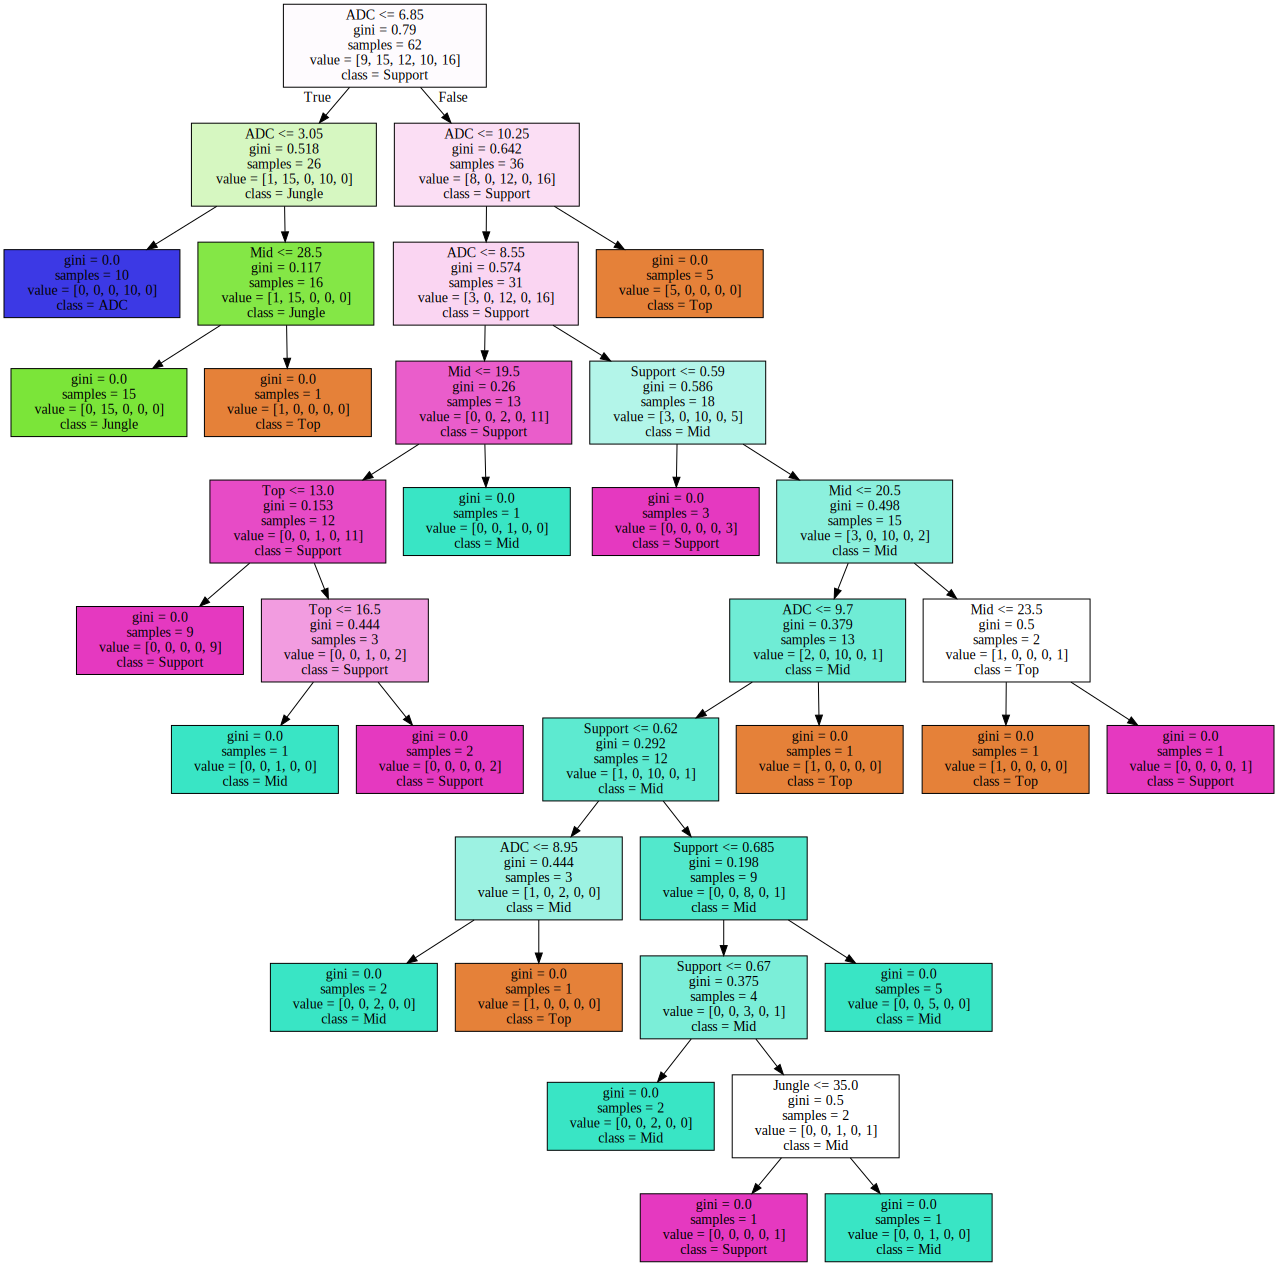

In [85]:
graficar_arbol(classifier,  ['Top', 'Jungle', 'Mid', 'ADC', 'Support'], ['Top', 'Jungle', 'Mid', 'ADC', 'Support'])